In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/sandr/OneDrive/Desktop/Dreamers/directional-forecasting-in-cryptocurrencies/train.csv", parse_dates=['timestamp'])

# Check the first few rows to confirm the dataset
print(df.head())

    timestamp     open     high      low    close   volume  \
0  1525471260  0.90120  0.90130  0.90120  0.90130   134.98   
1  1525471320  0.90185  0.90195  0.90185  0.90195  1070.54   
2  1525471380  0.90140  0.90140  0.90139  0.90139  2293.06   
3  1525471440  0.90139  0.90140  0.90138  0.90139  6850.59   
4  1525471500  0.90139  0.90139  0.90130  0.90130   832.30   

   quote_asset_volume  number_of_trades  taker_buy_base_volume  \
0          121.646459               4.0                 125.08   
1          965.505313              12.0                 879.94   
2         2066.963991               5.0                   0.00   
3         6175.000909              19.0                1786.30   
4          750.222624               3.0                 784.82   

   taker_buy_quote_volume  target  
0              112.723589     1.0  
1              793.612703     0.0  
2                0.000000     0.0  
3             1610.149485     0.0  
4              707.428900     0.0  


In [3]:
# Separate features (X) and target (y)
X = df.drop(['timestamp', 'target'], axis=1)  # Drop 'timestamp' and 'target' columns from the features
y = df['target']  # The 'target' column is what we want to predict (up or not)

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
rf_model = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')

In [7]:
# Use only the first 10,000 rows to test
X_train_sample = X_train[:10000]
y_train_sample = y_train[:10000]

rf_model.fit(X_train_sample, y_train_sample)


C:\Users\sandr\AppData\Local\Temp\ipykernel_33808\1956796766.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_sample = y_train[:10000]


RandomForestClassifier(class_weight='balanced', n_estimators=10,
                       random_state=42)

In [8]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

C:\Users\sandr\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [9]:
# After scaling, convert back to a DataFrame and use the same columns as X_train
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# Now make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

In [10]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1_rf = f1_score(y_test, y_pred_rf)

# Print the F1 score
print(f"F1 Score (Random Forest):", f1_rf)


F1 Score (Random Forest): 0.5626555474863525


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.4949492094005013
Precision: 0.4779096564032367
Recall: 0.6839351514339984


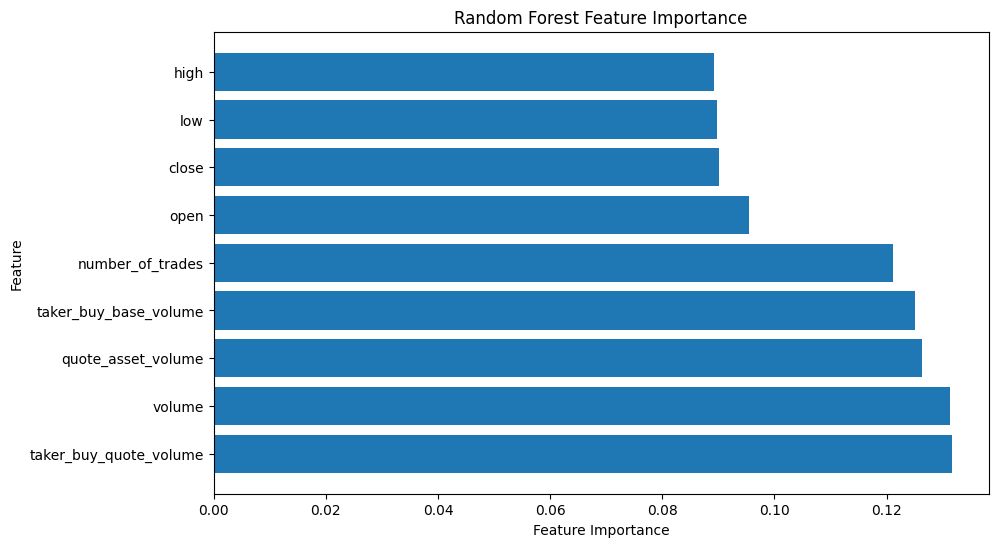

In [12]:
import matplotlib.pyplot as plt

# Get feature importance from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


In [14]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 500],            # Number of trees
    'max_depth': [10, 20, 30, 40, None],            # Depth of the tree
    'min_samples_split': [2, 5, 10],                # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],                  # Minimum samples at leaf
    'bootstrap': [True, False],                     # Whether to use bootstrap samples
    'max_features': ['auto', 'sqrt'],               # Number of features to consider
}


In [15]:
# Initialize the model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_grid,
                                   n_iter=20,     # Number of random combinations to try
                                   scoring='f1',  # F1 score is the evaluation metric
                                   cv=3,          # 3-fold cross-validation
                                   verbose=2,     # Show progress
                                   random_state=42,
                                   n_jobs=-1)     # Use all available cores


In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [50, 100],  # Fewer trees
    'max_depth': [3, 5, 7, 10],  # Narrower depth range
    'min_samples_split': [2, 5, 10],  # Small search space
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Random Forest model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# RandomizedSearchCV with 3-fold cross-validation and a reduced parameter grid
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model on a smaller sample of the data
rf_random.fit(X_train_scaled[:10000], y_train[:10000])  # Using a subset of the training data for faster tuning

# Get the best parameters
best_rf = rf_random.best_estimator_
print("Best Random Forest Parameters:", rf_random.best_params_)


C:\Users\sandr\AppData\Local\Temp\ipykernel_33808\1659628903.py:21: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  rf_random.fit(X_train_scaled[:10000], y_train[:10000])  # Using a subset of the training data for faster tuning


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Random Forest Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 3, 'bootstrap': False}


In [17]:
# Fit the model with the best parameters on the full training data
final_rf_model = RandomForestClassifier(
    n_estimators=50, 
    min_samples_split=10, 
    min_samples_leaf=2, 
    max_depth=3, 
    bootstrap=False, 
    class_weight='balanced',
    random_state=42
)

final_rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_final_rf = final_rf_model.predict(X_test_scaled)

# Calculate performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_final_rf)
precision = precision_score(y_test, y_pred_final_rf)
recall = recall_score(y_test, y_pred_final_rf)
f1 = f1_score(y_test, y_pred_final_rf)

print(f"Final Model Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


C:\Users\sandr\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Final Model Performance:
Accuracy: 0.5078612351821489
Precision: 0.4856643549748712
Recall: 0.610561448926051
F1 Score: 0.5409979061065667


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and fit the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Calculate performance metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")


C:\Users\sandr\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Decision Tree Model Performance:
Accuracy: 0.5038328527543771
Precision: 0.47780403868594373
Recall: 0.47923764747891034
F1 Score: 0.4785197693391403


In [19]:
from sklearn.linear_model import LogisticRegression

# Create and fit the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate performance metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")


C:\Users\sandr\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Logistic Regression Model Performance:
Accuracy: 0.5254235690997154
Precision: 0.5073616250688923
Recall: 0.03195810334310327
F1 Score: 0.060128767378930685


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [21]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}


In [22]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, 
                           scoring='f1', cv=3, verbose=2, n_jobs=-1)


In [23]:
# Fit the model (using a subset for speed)
grid_search.fit(X_train_scaled[:10000], y_train[:10000])

# Print the best parameters found by GridSearchCV
print("Best Decision Tree Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


C:\Users\sandr\AppData\Local\Temp\ipykernel_33808\2585310214.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  grid_search.fit(X_train_scaled[:10000], y_train[:10000])


Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [24]:
# Get the best model from grid search
best_dt_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_dt = best_dt_model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


C:\Users\sandr\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.5176047379431221
Precision: 0.4808271505178873
Recall: 0.19476886911758143
F1 Score: 0.2772371583773653


In [25]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [26]:
# Scaling the data for Logistic Regression and other models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
# Base models
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
dt = DecisionTreeClassifier(max_depth=10, class_weight='balanced', random_state=42)

# Define the base models as a list
base_models = [('log_reg', log_reg), ('rf', rf), ('dt', dt)]


In [28]:
# Meta model
meta_model = LogisticRegression()


In [29]:
# Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)


In [30]:
from sklearn.linear_model import LogisticRegression

# Meta-classifier: Use Logistic Regression for simplicity
meta_classifier = LogisticRegression()
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_classifier, n_jobs=-1)


In [31]:
# Train with a small subset for faster runtime
X_train_small = X_train_scaled[:10000]
y_train_small = y_train[:10000]

# Fit the model on this subset
stacking_clf.fit(X_train_small, y_train_small)


C:\Users\sandr\AppData\Local\Temp\ipykernel_33808\731336276.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_small = y_train[:10000]


StackingClassifier(estimators=[('log_reg', LogisticRegression(max_iter=1000)),
                               ('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       random_state=42)),
                               ('dt',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=10,
                                                       random_state=42))],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [32]:
# Simplify the base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42, n_jobs=-1)),
    ('dt', DecisionTreeClassifier(max_depth=3, random_state=42))
]


In [33]:
# Fit with reduced number of folds (3 instead of 5)
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_classifier, cv=3, n_jobs=-1)


In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Resampling with SMOTE (using a subset of data to speed up)
sample_size = 10000  # Using a smaller subset initially
X_train_sample = X_train_scaled[:sample_size]
y_train_sample = y_train[:sample_size]

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sample, y_train_sample)

# Train Random Forest model on the resampled dataset
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf_smote = rf_model_smote.predict(X_test_scaled)

# Evaluate the new model
f1_rf_smote = f1_score(y_test, y_pred_rf_smote)
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
precision_rf_smote = precision_score(y_test, y_pred_rf_smote)
recall_rf_smote = recall_score(y_test, y_pred_rf_smote)

# Print performance metrics
print(f"F1 Score (Random Forest with SMOTE): {f1_rf_smote}")
print(f"Accuracy: {accuracy_rf_smote}")
print(f"Precision: {precision_rf_smote}")
print(f"Recall: {recall_rf_smote}")


C:\Users\sandr\AppData\Local\Temp\ipykernel_33808\1996296516.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_sample = y_train[:sample_size]


F1 Score (Random Forest with SMOTE): 0.4737166324435318
Accuracy: 0.5048953091724618
Precision: 0.4784346057935974
Recall: 0.4690908008867332


In [39]:
import lightgbm as lgb

# Create LightGBM dataset
train_data = lgb.Dataset(X_train_scaled, label=y_train)

# Define parameters
params = {
    'objective': 'binary',
    'boosting': 'gbdt',
    'metric': 'f1',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'n_estimators': 100
}

lgb_model = lgb.train(params, train_data)
y_pred_lgb = lgb_model.predict(X_test_scaled)

# Convert probabilities to binary predictions
y_pred_lgb_binary = [1 if x >= 0.5 else 0 for x in y_pred_lgb]
f1_lgb = f1_score(y_test, y_pred_lgb_binary)
print(f"F1 Score (LightGBM): {f1_lgb}")


C:\Users\sandr\AppData\Roaming\Python\Python310\site-packages\lightgbm\engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 808185, number of negative: 889765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 1697950, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475977 -> initscore=-0.096166
[LightGBM] [Info] Start training from score -0.096166
F1 Score (LightGBM): 0.10901394952614205


In [40]:
# Setting class weights in LightGBM
params = {
    'objective': 'binary',
    'boosting': 'gbdt',
    'metric': 'f1',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'n_estimators': 100,
    'scale_pos_weight': sum(y_train == 0) / sum(y_train == 1)  # Handle imbalance
}


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

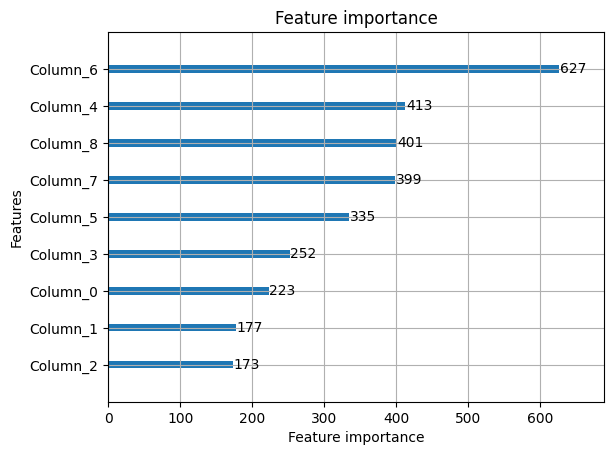

In [41]:
lgb.plot_importance(lgb_model, max_num_features=10)


In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'num_leaves': [31, 127],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, -1],
}

grid_search = GridSearchCV(estimator=lgb.LGBMClassifier(), param_grid=param_grid, cv=3, scoring='f1', verbose=2)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[LightGBM] [Info] Number of positive: 538790, number of negative: 593176
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 1131966, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475977 -> initscore=-0.096165
[LightGBM] [Info] Start training from score -0.096165
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [43]:
df['MA_10'] = df['close'].rolling(window=10).mean()
df['MA_30'] = df['close'].rolling(window=30).mean()


In [44]:
delta = df['close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI_14'] = 100 - (100 / (1 + rs))


In [45]:
df['MA_20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['Bollinger_Upper'] = df['MA_20'] + (df['stddev'] * 2)
df['Bollinger_Lower'] = df['MA_20'] - (df['stddev'] * 2)


In [46]:
df['Price_Range'] = df['high'] - df['low']


In [47]:
df['Pct_Change'] = (df['close'] - df['open']) / df['open'] * 100


In [48]:
df['Volume_Change'] = df['volume'].diff()


In [49]:
df['Close_Lag_1'] = df['close'].shift(1)
df['Close_Lag_3'] = df['close'].shift(3)


In [50]:
df['Volume_Lag_1'] = df['volume'].shift(1)
df['Volume_Lag_3'] = df['volume'].shift(3)


In [51]:
df.dropna(inplace=True)


In [52]:
df['Hour_of_Day'] = pd.to_datetime(df['timestamp'], unit='s').dt.hour


In [53]:
df['Day_of_Week'] = pd.to_datetime(df['timestamp'], unit='s').dt.dayofweek


In [54]:
df = pd.get_dummies(df, columns=['Hour_of_Day', 'Day_of_Week'], drop_first=True)


In [55]:
df.drop(columns=['timestamp'], inplace=True)


In [56]:
X = df.drop(columns=['target'])
y = df['target']


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=50, 
    min_samples_split=10, 
    min_samples_leaf=2, 
    max_depth=3, 
    bootstrap=False,
    random_state=42
)
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(bootstrap=False, max_depth=3, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=50, random_state=42)

In [ ]:
# Fit the model (re-run to ensure it completes)
rf.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Display metrics
print(f"Random Forest Model - Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
